# salinity / conductivity

Salinity is a cornerstone hydrological variable that determines seawater density along side temperature and pressure.
It is a central dynamical variable that conditions the evolution of the Ocean circulation from micro to climatic scales as well as the Ocean biological and ecological evolution [Röthig et al. 2023].

Additional online ressource about the "art" of measuring conductivity may be found on the [salinometry](https://salinometry.com) website.

**contributions:**

- Aurélien Ponte, Louis Marié: 07/2024

---

## sensing physics

### background

The observation of salinity has a long history [Wallace 1974]:

- 1819: A. Marcet formulates the principle of constant relative proportions that states that the chemical composition of seawater is nearly constant globally 
- 1902 The work of the [ International Council for the EXploration of the Sea - Knudsen] leads to: 
    - the first definition of absolute salinity  : “the total amount of solid material in grams contained in one kilogram of seawater when all the carbonate has been converted to oxide, all the bromine and iodine replaced by chlorine and all the organic material oxidized” - but this is very difficult to measure !
    - the empirical relation: $S=0.03 + 1.805 Cl$, variables expressed in ppt = part per thousands = g/kg = ‰
    - Cl can be measured by titration (chemically) - precision down to 0.02 ‰ (on salinity). But titration prohibits automated sampling.

````{panels}
:container: container-fluid 
:column: col-lg-6 col-md-6 col-sm-6 col-xs-12 
:card: shadow-none border-0

```{figure} ../_static/conductivity_picture_seawater_composition.png
:width: 300px
:name: seawater_composition
:align: left

Seawater chemical composition - source: [Thurman and Trujillo 2004]
```

---

```{figure} ../_static/conductivity_picture_titration.png
:width: 300px
:name: titration
:align: right

Titration illustration - source: [Chemsitry Made Simple](https://chemistrymadesimple.net/episode/13/)
```

````

- Early 1970s: technological developments enable accurate measurements of **conductivity** (from ships at depth)
- 1978, the **Practical Salinity Scale** based on conductivity is developed:
    \begin{align*}
    S_p = 0.0080 &- 0.1692 K_{15}^{1/2} + 25.3851 K_{15} + 14.0941 K_{15}^{3/2} \\
        &- 7.0261 K_{15}^2 + 2.7081 K_{15}^{5/2}
    \end{align*}
    with $ K_{15} = C(S_p, 15, 0) / C(KCl, 15, 0) $, $2\le S \le 42$, and $KCl$ representing the standard potassium chloride solution.
    - practical salinity is unit-less but usually referred to as psu 
    - conductivity unit: S/m (siemens per meter) = (ohm/m)-1
    - salinity (via Cl) - conductivity relationship is accurate to ±0.002‰ in salinity above 27.1‰ and ±0.005‰ for fresher waters [Wooster et al. 1969]

The focus shifted then on the measurement of **conductivity**.

```{figure} ../_static/conductivity_picture_millero.jpg
:width: 300px
:name: conductivity_millero
:align: left

A change of paradigm: "Since the definition of PSS-78, conductivity is the single standard property used to estimate thermodynamic properties (such as density) of seawater samples taken from arbitrary locations. Chlorinity is regarded as an independent property of lower significance, this way resolving the conflict in Fig. 2" [Millero et al. 2008]
```

```{figure} https://upload.wikimedia.org/wikipedia/commons/9/98/Water_salinity_diagram.png
:width: 250px
:name: salinity_values
:align: right

Typical salinity values - source: [wikipedia](https://en.wikipedia.org/wiki/Salinity)
```

Relevant range of variations in the ocean:

- 0 < practical salinity < 42
- 0 < conductivity < 70 mS/cm or 0 < conductivity < 7 S/m

Around $Sp=35$, $T=10$, $p=0$dbar, conductivity (in mS/cm) may be approximated by : $C = 38.1 + 0.98 S + 0.95 T$

**conductivity is a stronger function of temperature - temperature must therefore also be measured (salinity being the final target):**
- with sufficient accuracy and temporal resolution and lag
- within the same water mass (design constraint)

[GSW](https://teos-10.github.io/GSW-Python/) is a useful python library to relate salinity, conductivity, temperature, density, etc:

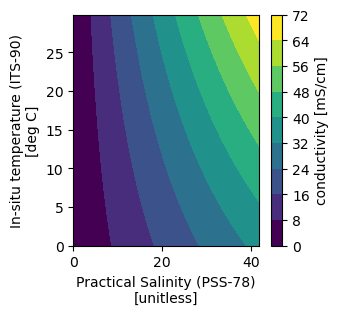

In [2]:
# To hide code from jupyter rendering add "remove-input" tag in cell, see: 
#    https://jupyterbook.org/en/stable/content/metadata.html#jupyter-cell-tags

# pandas and html links:
#    https://github.com/softhints/Pandas-Tutorials/blob/master/styling/create-clickable-link-pandas-dataframe-jupyterlab.ipynb?ref=datascientyst.com

# caption and link for code generated figures:
#   https://github.com/executablebooks/jupyter-book/issues/1565

from IPython.display import HTML
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import myst_nb
import gsw

# generate dummy dataset to illustrate conductivity dependence on temperature&salinity
w = xr.Dataset(
    coords={
        "t": ("t", np.arange(0,30,.1), {"units": "deg C", "long_name": "In-situ temperature (ITS-90)"}),
        "Sp": ("Sp", np.arange(0,42,.1), {"units": "unitless", "long_name": "Practical Salinity (PSS-78)"}),
    },
)
w["C"] = gsw.C_from_SP(w["Sp"], w["t"], 0.)
w["C"].attrs.update(
    units="mS/cm",
    long_name="conductivity",
)

w["C"].plot.contourf(x="Sp", levels=10, figsize=(3,3));
myst_nb.glue('conductivity_plot', plt.gcf(), display=False)

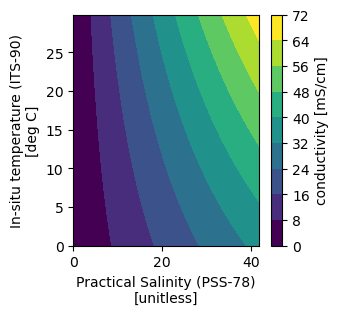

In [4]:
import gsw
import xarray as xr
import numpy as np

# generate dummy dataset to illustrate conductivity dependence on temperature&salinity
w = xr.Dataset(
    coords={
        "t": ("t", np.arange(0,30,.1), {"units": "deg C", "long_name": "In-situ temperature (ITS-90)"}),
        "Sp": ("Sp", np.arange(0,42,.1), {"units": "unitless", "long_name": "Practical Salinity (PSS-78)"}),
    },
)
w["C"] = gsw.C_from_SP(w["Sp"], w["t"], 0.)
w["C"].attrs.update(
    units="mS/cm",
    long_name="conductivity",
)

w["C"].plot.contourf(x="Sp", levels=10, figsize=(3,3));

:::{glue:figure} conductivity_plot
:name: conductivity_plot

Conductivity as a function of temperature and salinity (near ocean surface)
:::

In [5]:
# this cell will not be shown and is for internal purpose
Sp0, T0, p0 = 35, 10, 0
dSp, dT = 1., 1.
C0 = gsw.C_from_SP(Sp0, T0, p0)
dCdSp = (gsw.C_from_SP(Sp0+dSp, T0, p0) - C0)/dSp
dCdT = (gsw.C_from_SP(Sp0, T0+dT, p0) - C0)/dT

C0, dCdSp, dCdT

(38.08970618391573, 0.9740768289414206, 0.9507624163407513)

### non-contact - inductive sensing

```{figure} ../_static/conductivity_induction.jpg
:width: 300px
:name: induction
:align: right

Inductive principle - source unknown
```

A first method employed to measure seawater conductivity relies on [induction](https://en.wikipedia.org/wiki/Electromagnetic_induction).

An oscillating electrical voltage $U_{in}$ is forced in a first coil and drives an electrical current in seawater that is proportional to its conductivity.
This currents drives voltage fluctuations in a receiving coil which can be measured to infer seawater conductivity.

*to do: basic physical modeling see [Striggow and Dankert 1985, Sheng et al. 2015, Ashokan et al. 2023]*

**Advantages**

- No electrode contamination: sensors are unaffected by contaminants (i.e. “dirt”) and able to measure within 20cm of the air-sea interface (no pump to turn off)
- Rugged sensor construction withstands rough handling and can be used in freezing conditions
- Naturally flushed, pump-free design uses relatively little power offering longer autonomous deployments on a variety of platforms
- Acoustically noise-free design (no pump) that will not affect passive acoustic monitoring

**Drawbacks**:

- Sensors need to be calibrated in fully-integrated state in order to avoid proximity effects and obtain stated accuracy. This is because electrical current flows outside of the cell
- Sensitivity to presence of material and/or buble within the cell


````{panels}
:container: container-fluid 
:column: col-lg-6 col-md-6 col-sm-6 col-xs-12 
:card: shadow-none border-0

```{figure} ../_static/conductivity_rbr.jpg
:width: 300px
:name: rbr
:align: left

RBR conductivity sensor.
The initial accuracy of the sensor is about 0.003 mS/cm.
Source: [RBR](https://rbr-global.com/ocean-salinity/).
See [Dever et al. 2022] for performance report.
```

---

```{figure} ../_static/conductivity_d2inc.jpg
:width: 250px
:name: d2inc
:align: right

D2inc conductivity/temperature sensor - source: [D2inc](https://www.d-2.com)
```

````

### contact / electrode sensing

Electrode-based conductivity sensors rely on measuring seawater resistivity in a small volume of water contained in an insulating material, often borosilicate glass (weak deformation under pressure).
The seawater’s conductivity is deduced from the measured resistivity between the electrodes placed within the cell.
Such sensors are labelled "electrolytic conductivity sensors".
Designs of electrode type conductivity sensors distinguish themselves by the number of electrodes employed and by their geometry (e.g. planar vs cylindrical) [Thirstrup et al. 2021].

#### 2 electrodes

The simplest design involves the use of two electrodes:

```{figure} ../_static/conductivity_2electrodes_0.jpg
---
width: 300px
name: electrode0
align: center
---
Illustration of electrolytic conductivity sensor - source: [Moron 2006]
```

The conductivity ($\kappa$ in the figure above) is related to measured current tension $V$ and intensity $I$ by the so-called cell constant $K$ which depends on the cell geometry:

\begin{align*}
\kappa = \frac{V}{I} \times K
\end{align*}

The cell constant may be predicted theoretically but requires often being callibration experimentally.

The interaction between the electrode and seawater (the electrolyte) is a complex process which gives rise to polarization effects [Moron 2006, Thirstrup et al. 2021].
These effects are frequency dependent and can be modelled (double layer capacitance, Warburg/diffusion impedance, Faraday resistance) but may prohibit measurements in configurations where cells are small and/or conductive liquids such as seawater (see Moron 2006 quantitative example).

```{figure} ../_static/conductivity_2electrodes_1.jpg
---
width: 300px
name: electrode1
align: center
---
"Illustration of two- and four-electrode method of measurement and distribution of the potential along the conductivity sensor ..." - source: [Moron 2006]
```

#### 3 electrodes

In practice, 3 electrodes (2 being shorted) are used in order to minimize polarization effects [Thirstrup et al. 2021].
The seabird conductivity (Beckman) cell is based on a three electrode design.
The conductivity cell constitutes a variable resistance in a Wien Bridge Oscillator.
Outside electrodes are connected to ground.
An A/C current is applied to the inner electrode to mitigate electrode polarization.
A pump controls the flow of water and ensures temperature/conductivity measurement temporal synchronicity.
Improper temperature alignment of temperature and conductivity measurements leads to spiking at sharp water transitions.
Typical accuracies of such system is of order $0.01$ psu.
Seabird ctd temperature/conductivity responses is estimated to be at about 0.06s


````{panels}
:container: container-fluid 
:column: col-lg-6 col-md-6 col-sm-6 col-xs-12 
:card: shadow-none border-0

```{figure} ../_static/conductivity_seabird0.jpg
:width: 400px
:name: seabird0
:align: left

Seabird conductivity cell - source: seabird
```

---

```{figure} ../_static/conductivity_seabird1.jpg
:width: 300px
:name: seabird1
:align: right

Exhaust path of TC duct water - source: seabird - [application note 38](https://www.seabird.com/asset-get.download.jsa?code=251011)
```

````

#### 4 electrodes

Four electrodes sensors is the standard for high precision conductivity measurements.
On the illustration above, electrodes 2 and 3 are measuring electrodes and should not disturb the original distribution of the potential.

Polarization effects have to be modelled, calibrated and corrected for [Moron 2006, Ashokan et al. 2023].

Guildline salinometers are laboratory instruments that are based on 4 electrode design and reach high accuracies (0.002 psu).

#### electrode designs pros/cons

**Advantages:**

- Well known and established sensors 
- Fully-enclosed electromagnetic field is unaffected by nearby objects (such as antennas, sensor guards, or other instruments)
- Temperature and conductivity are measured on the same small water parcel (if sensor inside cell or well-thought pumping system / flow design)

**Drawbacks:**

- Fouling (major): electrode surfaces can become fouled by surface contaminants, so pump must be stopped metres before reaching surface: requires: calibration pre/post deployment
- Thermal mass: nearby strong thermal gradients water is warmed up by the sensor body
- If pumping: complex assembly which requires care to clean (prior to storage for instance) and is not suitable for use in freezing conditions requires power to operate which impacts the endurance of the instruments and/or the size of the required power supply causes vibrations and noise which may affect sensitive acoustic or microstructure measurements

### other

#### acoustic sensing

...

#### optical sensing

...

#### MEMS

...

### references

#### background

- Emery, W.J., Thomson, R.E., 2001. Data analysis methods in physical oceanography, 2nd ed. Elsevier, Amsterdam.

- IOC, SCOR and IAPSO, 2010. The international thermodynamic equation of seawater – 2010: Calculation and use of thermodynamic properties (No. 56), Intergovernmental Oceanographic Commission, Manuals and Guides. UNESCO.

- Millero, F.J., Feistel, R., Wright, D.G., McDougall, T.J., 2008. The composition of Standard Seawater and the definition of the Reference-Composition Salinity Scale. Deep Sea Research Part I: Oceanographic Research Papers 55, 50–72. doi: [10.1016/j.dsr.2007.10.001](https://doi.org/10.1016/j.dsr.2007.10.001)

- Röthig, T., Trevathan-Tackett, S.M., Voolstra, C.R., Ross, C., Chaffron, S., Durack, P.J., Warmuth, L.M., Sweet, M., 2023. Human-induced salinity changes impact marine organisms and ecosystems. Global Change Biology 29, 4731–4749. doi: [10.1111/gcb.16859](https://doi.org/10.1111/gcb.16859)

- Stewart R. H., 2008. Introduction to physical oceanography. Robert H. Stewart. Available electronically from [https://hdl.handle.net/1969.1/160216](https://hdl.handle.net/1969.1/160216)

- Thurman, H.V., Trujillo, A.P., 2004. Introductory oceanography, 10th ed. ed. Pearson Prentice Hall, Upper Saddle River, N.J.

- Wooster, W.S., Lee, A.J., Dietrich, G., 1969. Redefinition of salinity. Limnology & Oceanography 14, 437–438. doi: [10.4319/lo.1969.14.3.0437](https://doi.org/10.4319/lo.1969.14.3.0437)

- Wallace, W.J., 1974. The development of the chlorinity/salinity concept in oceanography, Elsevier oceanography series, v. 7. Elsevier Scientific Pub. Co, Amsterdam, New York.

#### inductive method

- Ashokan, R.R., Suresh, G., Ramesh, R., 2023. Toroidal Seawater Conductivity Sensors and Instrumentation for Antisubmarine Warfare. IEEE Sensors Journal 23, 26531–26538. doi: [10.1109/JSEN.2023.3319037](https://doi.org/10.1109/JSEN.2023.3319037)

- Dever, M., Owens, B., Richards, C., Wijffels, S., Wong, A., Shkvorets, I., Halverson, M., Johnson, G., 2022. Static and Dynamic Performance of the RBRargo3 CTD. Journal of Atmospheric and Oceanic Technology 39, 1525–1539. doi: [10.1175/JTECH-D-21-0186.1](https://doi.org/10.1175/JTECH-D-21-0186.1)

- Sheng, W., Hui, L., Jin-Jin, L., Yu, T., Yun, D., Hong-Zhi, L., Ning, L., 2015. Investigation of the Performance of an Inductive Seawater Conductivity Sensor 186. [https://www.sensorsportal.com/HTML/DIGEST/P_2621.htm](https://www.sensorsportal.com/HTML/DIGEST/P_2621.htm)

- Kang Hui, S., Jang, H., Kim Gum, C., Yu Song, C., Kim Yong, H., 2020. A new design of inductive conductivity sensor for measuring electrolyte concentration in industrial field. Sensors and Actuators A: Physical 301, 111761. doi: [10.1016/j.sna.2019.111761](https://doi.org/10.1016/j.sna.2019.111761)

- Striggow, K., Dankert, R., 1985. The exact theory of inductive conductivity sensors for oceanographic application. IEEE Journal of Oceanic Engineering 10, 175–179. doi: [10.1109/JOE.1985.1145085](https://doi.org/10.1109/JOE.1985.1145085)

- [https://rbr-global.com/ocean-salinity/](https://rbr-global.com/ocean-salinity/)

- [https://www.aanderaa.com/conductivity-sensor](https://www.aanderaa.com/conductivity-sensor)

- [https://www.d-2.com/?page_id=1014](https://www.d-2.com/?page_id=1014)


#### electrodes method

- Ashokan, R.R., Suresh, G.N., Ramesh, R., 2023. Studies of the Four-Electrode Cell and Dynamic Flow-Through Profiling Experiment on Seawater Conductivity. IEEE Sensors J. 23, 26430–26437. doi: [10.1109/JSEN.2023.3313190](https://doi.org/10.1109/JSEN.2023.3313190)

- D. Elliott, J., A. Papaderakis, A., W. Dryfe, R.A., Carbone, P., 2022. The electrochemical double layer at the graphene/aqueous electrolyte interface: what we can learn from simulations, experiments, and theory. Journal of Materials Chemistry C 10, 15225–15262. doi: [10.1039/D2TC01631A](https://doi.org/10.1039/D2TC01631A)

- Fulton, S.G., Stegen, J.C., Kaufman, M.H., Dowd, J., Thompson, A., 2023. Laboratory evaluation of open source and commercial electrical conductivity sensor precision and accuracy: How do they compare? PLoS One 18, e0285092. doi: [10.1371/journal.pone.0285092](https://doi.org/10.1371/journal.pone.0285092)

- Méndez-Barroso, L.A., Rivas-Márquez, J.A., Sosa-Tinoco, I., Robles-Morúa, A., 2020. Design and implementation of a low-cost multiparameter probe to evaluate the temporal variations of water quality conditions on an estuarine lagoon system. Environ Monit Assess 192, 710. doi: [10.1007/s10661-020-08677-5](https://doi.org/10.1007/s10661-020-08677-5)

- Moron, Z., 2006. Considerations on the accuracy of measurements of electrical conductivity of liquids. Presented at the XVIII IMEKO World Congress, Rio de Janeiro, Brazil.

- Sylvan, K., 1987. RF electrolytic conductivity transducers. The University of Edinburgh.

- Thirstrup, C., Deleebeeck, L., 2021. Review on Electrolytic Conductivity Sensors. IEEE Trans. Instrum. Meas. 70, 1–22. doi: [10.1109/TIM.2021.3083562](https://doi.org/10.1109/TIM.2021.3083562)

- seabird applications notes (see 38 on pumps): [https://www.seabird.com/application-notes](https://www.seabird.com/application-notes )

- [https://atlas-scientific.com/conductivity/](https://atlas-scientific.com/conductivity/)

#### other

- Gu, L., He, X., Zhang, M., Lu, H., 2022. Advances in the Technologies for Marine Salinity Measurement. JMSE 10, 2024. doi: [10.3390/jmse10122024](https://doi.org/10.3390/jmse10122024)


---
## Available sensors

In [15]:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html 

s = (
    pd.read_csv("sensors.csv", skiprows=1)
    .rename(columns=lambda x: x.strip())
    .set_index("sensor name")
)
# duplicate column to have an artificially wide table
#s = pd.concat([s,s,s], axis=1)
#s = pd.concat([s,]*10, axis=0) 

# can't 
# https://stackoverflow.com/questions/76157621/pandas-sticky-column-headers-using-styler-not-working-sticky-index-rows-works-g
# https://stackoverflow.com/questions/42724327/pandas-dataframe-table-vertical-scrollbars
HTML(
    s
    .to_html(render_links=True, escape=False, na_rep=" ")
    #.style.set_sticky(axis="index").set_sticky(axis="columns")
)

# not satisfactory as it hides rows
#HTML(s.style.set_sticky(axis="columns").to_html(render_links=True, escape=False, max_rows=5))

,type,technology,absolute accuracy,Range,relative accuracy,Response time,max sampling frequency,stability,niveau de validation,lien document de validation,intégration mécanique,intégration électronique interface de communication,coût,lien doc technique,lien fournisseur
sensor name,,,,,,,,,,,,,,,
Hobo Onset temperature,,,,,,,,,,,,,170 (2023),,Prosensor
PME Minidot Oxygen,,,,,,,,,,,,,1700 (2023),,Terra4
NaN,,,,,,,,,,,,,,,
"Conductivité CTD Seabird SBE19+, hydrocat",Instrument,Conductivité électrique,,,,,,,,,,,,,
Conductivité CTD NKE Wisens,Instrument,,,,,,,,,,,,,,
Conductivité CTD Valeport,Instrument,,,,,,,,,,,,,,
Conductivité CTD RBR,Instrument,,,,,,,,,,,,,,
Conductivité CTD Castaway Sontek,Instrument,,,,,,,,,,,,,,
Conductivité CTD YSI,Instrument,,,,,,,,,,,,,,
